In [1]:
import pickle

from model import *
#from model2 import *
from zipreg_model import *
from inference import *
from criticism import *

In [2]:
with open('data/demand_sample.pickle', 'rb') as f:
    data_samp = pickle.load(f)

In [3]:
data, features = feature_generation(data_samp)
# print(data["data"].shape)
data_data = data["data"]
data_demand = data["demand"]
# data["data"][150:250,0]
data_data[4,:]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [4]:
p = ZIPoissReg(features, data)

In [4]:
with open('data/demand_sample.pickle', 'rb') as f:
    data_samp = pickle.load(f)


#global features
data, features = feature_generation(data_samp)
#p = PoissReg(features, data)
p = ZIPoissReg(features, data)

train_new = False

if train_new:
    svi, elbo_loss = run_svi(p.model, p.guide,
                             iters=5000,
                             data=data['data'],
                             demand=data['demand'],
                             filename='models/svi_zip_params.pkl')

    plot_elbo(elbo_loss)

    svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                      svi=svi)

    print(svi.information_criterion())

else:
    svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                    model = p.model,
                                      guide = p.guide,
                                      filename='models/svi_params.pkl')

post_samples = posterior_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs','prediction'],
    num_samples=1000)


# post_samples = posterior_samples(
#     p.model,
#     svi_posterior,
#     data,
#     ['gate'],
#     num_samples=1000)


# post_samples = posterior_samples(
#     p.model,
#     svi_posterior,
#     data,
#     ['hour_amplitude','hour_period'],
#     num_samples=200)

# Example test statistics
# compare_test_statistic(data_samp.demand.values, post_samples[:,1,:],
#                        stat=perc_0)
# compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
#                        stat=max)
# compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
#                        stat=percentile, q=80)


# summary = site_summary(post_samples, ['obs','prediction'])

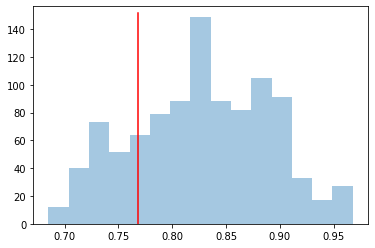

In [5]:
compare_test_statistic(data_samp.demand.values, post_samples[:,1,:],
                       stat=perc_0)

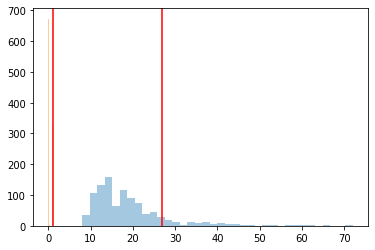

In [6]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=max)
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=percentile, q=80)


summary = site_summary(post_samples, ['obs','prediction'])

In [186]:
summary = site_summary(post_samples, ['obs','prediction'])

/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/probprog-finalproject/zipreg_model.py:108: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  with pyro.plate("data", len(data)):
Elbo loss: 91329.890625
Elbo loss: 22393.037109375
Elbo loss: 1088482.875
Elbo loss: 58968.703125
Elbo loss: 13443.8369140625
Elbo loss: 14325.6376953125
Elbo loss: 23348.201171875
Elbo loss: 425943.9375
Elbo loss: 23552.03515625
Elbo loss: 14033.5634765625


OrderedDict([('waic', tensor(2.9506e+10, grad_fn=<SumBackward0>)), ('p_waic', tensor(1.4753e+10, grad_fn=<SumBackward0>))])


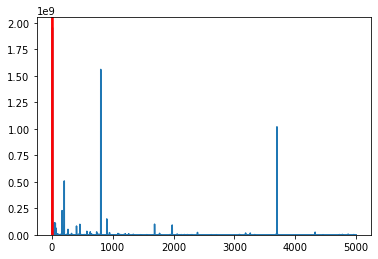

In [5]:
with open('data/demand_sample.pickle', 'rb') as f:
    data_samp = pickle.load(f)


#global features
data, features = feature_generation(data_samp)
#p = PoissReg(features, data)
p = ZIPoissReg(features, data)

train_new = True

if train_new:
    svi, elbo_loss = run_svi(p.model2, p.guide2,
                             iters=5000,
                             data=data['data'],
                             demand=data['demand'],
                             filename='models/svi_zip_params.pkl')

    plot_elbo(elbo_loss)

    svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                      svi=svi)

    print(svi.information_criterion())

else:
    svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                    model = p.model,
                                      guide = p.guide,
                                      filename='models/svi_params.pkl')

post_samples = posterior_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs','prediction'],
    num_samples=1000)


# post_samples = posterior_samples(
#     p.model,
#     svi_posterior,
#     data,
#     ['gate'],
#     num_samples=1000)


# post_samples = posterior_samples(
#     p.model,
#     svi_posterior,
#     data,
#     ['hour_amplitude','hour_period'],
#     num_samples=200)

# Example test statistics
compare_test_statistic(data_samp.demand.values, post_samples[:,1,:],
                       stat=perc_0)
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=max)
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=percentile, q=80)


summary = site_summary(post_samples, ['obs','prediction'])

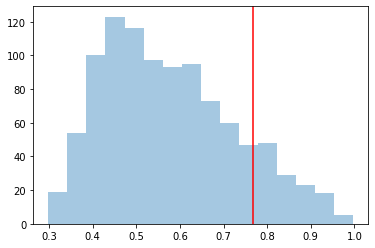

In [6]:
compare_test_statistic(data_samp.demand.values, post_samples[:,1,:],
                       stat=perc_0)

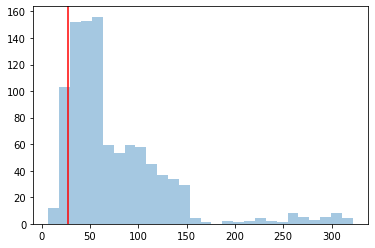

In [7]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=max)

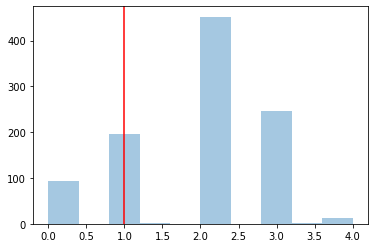

In [8]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=percentile, q=80)

In [137]:


post_samples = posterior_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs','prediction'],
    num_samples=200)

summary = site_summary(post_samples, ['obs','prediction'])

In [172]:
i = 8241
mu_i = summary["obs"]['mean'][i]
pred_i = summary["prediction"]['mean'][i]
print(mu_i,pred_i)

0.18000000715255737 0.12999999523162842


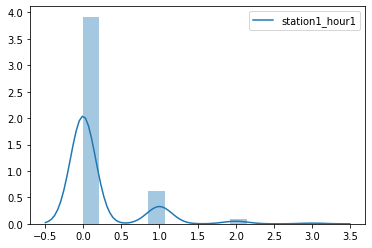

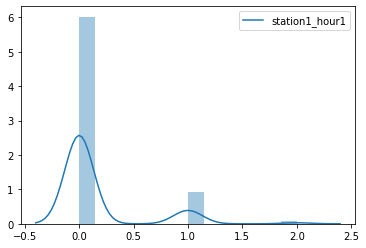

In [136]:
h0_s1 = post_samples[:,0,1] # 200 samples (i) for the 0th (j) hour for station 1 (k)
h1_s1 = post_samples[:,1,1] # 200 samples (i) for the 0th (j) hour for station 1 (k)
import seaborn as sns
# shows demand rate distribution for the specified hour and station
sns.distplot(h0_s1,kde_kws={"label": "station1_hour1"},)
plt.figure()
sns.distplot(h1_s1,kde_kws={"label": "station1_hour1"},)

In [139]:
h0_s1

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       2., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 3., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [62]:
summary# what is the mean here and why is it different from the observation or prediction?


{'obs':        mean       std   5%  25%  50%  75%   95%
 0     0.145  0.393381  0.0  0.0  0.0  0.0  1.00
 1     0.190  0.474368  0.0  0.0  0.0  0.0  1.00
 2     0.190  0.393285  0.0  0.0  0.0  0.0  1.00
 3     0.130  0.351737  0.0  0.0  0.0  0.0  1.00
 4     0.150  0.385021  0.0  0.0  0.0  0.0  1.00
 ...     ...       ...  ...  ...  ...  ...   ...
 8395  0.035  0.184241  0.0  0.0  0.0  0.0  0.00
 8396  0.045  0.207824  0.0  0.0  0.0  0.0  0.00
 8397  0.035  0.184241  0.0  0.0  0.0  0.0  0.00
 8398  0.055  0.249573  0.0  0.0  0.0  0.0  0.05
 8399  0.035  0.184241  0.0  0.0  0.0  0.0  0.00
 
 [8400 rows x 7 columns],
 'prediction':        mean       std   5%  25%  50%  75%  95%
 0     0.185  0.460254  0.0  0.0  0.0  0.0  1.0
 1     0.150  0.385021  0.0  0.0  0.0  0.0  1.0
 2     0.225  0.515464  0.0  0.0  0.0  0.0  1.0
 3     0.175  0.441986  0.0  0.0  0.0  0.0  1.0
 4     0.195  0.456087  0.0  0.0  0.0  0.0  1.0
 ...     ...       ...  ...  ...  ...  ...  ...
 8395  0.010  0.099748  0.0

In [91]:
def model_tmp(x):
    s = pyro.param("s",torch.Tensor([1.5]))
    z = pyro.sample("z",pyro.distributions.Normal(x,s))
    return z**2


In [97]:
trace = pyro.poutine.trace(model_tmp).get_trace(1.0)
logp = trace.log_prob_sum()

In [98]:
logp

tensor(-0.2278, grad_fn=<AddBackward0>)

In [99]:
params = [trace.nodes[name]["value"].unconstrained() for name in trace.param_nodes]

In [100]:
params

[tensor([0.5000], requires_grad=True)]

In [101]:
trace.nodes["z"]

{'type': 'sample',
 'name': 'z',
 'fn': Normal(loc: tensor([1.]), scale: tensor([0.5000], requires_grad=True)),
 'is_observed': False,
 'args': (),
 'kwargs': {},
 'value': tensor([0.9680], grad_fn=<AddBackward0>),
 'infer': {},
 'scale': 1.0,
 'mask': None,
 'cond_indep_stack': (),
 'done': True,
 'stop': False,
 'continuation': None,
 'log_prob_sum': tensor(-0.2278, grad_fn=<SumBackward0>)}

In [12]:
weather_samp = pd.read_csv('data/weather.csv')
weather_samp

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107
5,9/3/2013,73.0,67.0,60.0,59.0,56.0,51.0,84.0,65.0,46.0,...,10.0,10.0,24.0,15.0,31.0,0,2.0,NaN,276.0,94107
6,9/4/2013,74.0,68.0,61.0,59.0,57.0,56.0,90.0,72.0,53.0,...,10.0,10.0,29.0,19.0,35.0,0,4.0,NaN,269.0,94107
7,9/5/2013,72.0,66.0,60.0,57.0,56.0,54.0,90.0,74.0,57.0,...,10.0,10.0,31.0,21.0,37.0,0,3.0,NaN,270.0,94107
8,9/6/2013,85.0,71.0,56.0,57.0,51.0,45.0,86.0,58.0,29.0,...,10.0,10.0,24.0,8.0,28.0,0,0.0,NaN,287.0,94107
9,9/7/2013,88.0,73.0,58.0,64.0,54.0,46.0,86.0,59.0,31.0,...,10.0,10.0,21.0,8.0,25.0,0,1.0,NaN,305.0,94107


In [15]:
data_samp

,date_hour,start_station_id,id,installation_date,start_station_name,demand,month,weekday,hour,date,censored
0,2015-08-29 00:00:00,2,2,2013-08-06,0,0.0,8,5,0,2015-08-29,0.0
1,2015-06-23 00:00:00,2,2,2013-08-06,0,0.0,6,1,0,2015-06-23,0.0
2,2013-12-30 00:00:00,2,2,2013-08-06,0,0.0,12,0,0,2013-12-30,0.0
3,2015-02-28 00:00:00,2,2,2013-08-06,0,0.0,2,5,0,2015-02-28,0.0
4,2013-11-02 00:00:00,2,2,2013-08-06,0,0.0,11,5,0,2013-11-02,0.0
5,2014-03-31 01:00:00,2,2,2013-08-06,0,0.0,3,0,1,2014-03-31,0.0
6,2015-07-21 01:00:00,2,2,2013-08-06,0,0.0,7,1,1,2015-07-21,0.0
7,2014-07-19 01:00:00,2,2,2013-08-06,0,0.0,7,5,1,2014-07-19,0.0
8,2014-10-28 01:00:00,2,2,2013-08-06,0,0.0,10,1,1,2014-10-28,0.0
9,2014-10-24 01:00:00,2,2,2013-08-06,0,0.0,10,4,1,2014-10-24,0.0
